2024-09-05 01:27:41.702469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-05 01:27:41.702604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 01:27:41.826237: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


 Write image to: output.png


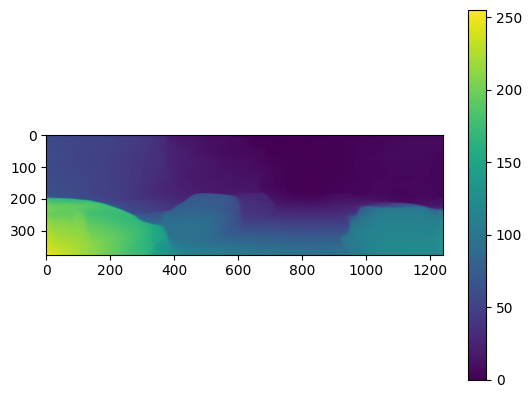

In [1]:
import cv2
import tensorflow as tf
import urllib.request
import matplotlib.pyplot as plt

# input
# img = cv2.imread('/kaggle/input/input-data/video - kitti/image_02/data/0000000459.png')
img = cv2.imread('/data/left/000008.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0

img_resized = tf.image.resize(img, [256,256], method='bicubic', preserve_aspect_ratio=False)
#img_resized = tf.transpose(img_resized, [2, 0, 1])
img_input = img_resized.numpy()
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
img_input = (img_input - mean) / std
reshape_img = img_input.reshape(1,256,256,3)
tensor = tf.convert_to_tensor(reshape_img, dtype=tf.float32)

# load model
model_path = '/model/1.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']

# inference
interpreter.set_tensor(input_details[0]['index'], tensor)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])
output = output.reshape(256, 256)

# output file
prediction = cv2.resize(output, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
print(" Write image to: output.png")
depth_min = prediction.min()
depth_max = prediction.max()
img_out = (255 * (prediction - depth_min) / (depth_max - depth_min)).astype("uint8")

cv2.imwrite("output.png", img_out)
plt.imshow(img_out)
plt.colorbar()

In [2]:
print("depth_min:", depth_min)
print("depth_max:", depth_max)

depth_min: 7.477925
depth_max: 1254.7379


In [3]:
!pip install ultralytics

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 752.6 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 6.9 MB/s eta 0:00:00a 0:00:01


In [4]:
from ultralytics import YOLO

object_model = YOLO("/model/yolov8s.pt")  

100%|██████████| 83.7M/83.7M [00:00<00:00, 89.8MB/s]



image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000025.png: 224x640 1 car, 82.5ms
Speed: 3.1ms preprocess, 82.5ms inference, 199.8ms postprocess per image at shape (1, 3, 224, 640)
Frame 26 - Min: -0.51m - Max: 865.26m


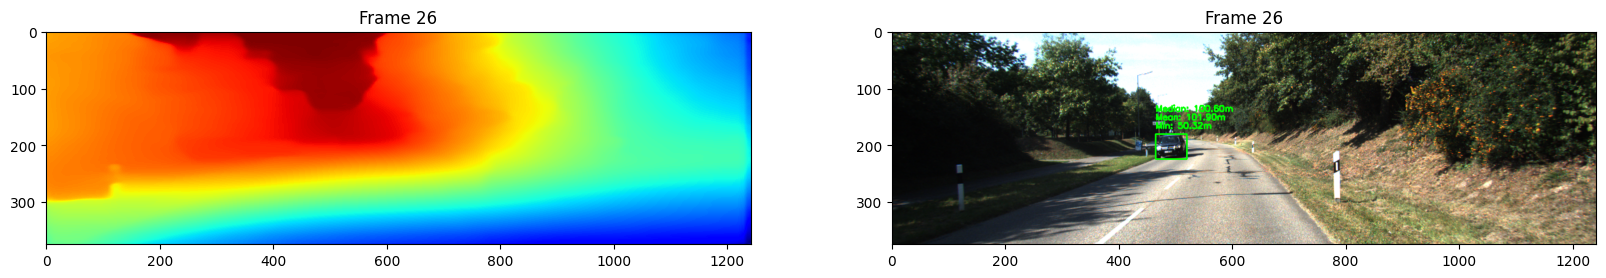


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000026.png: 224x640 1 car, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Frame 27 - Min: 19.73m - Max: 919.95m


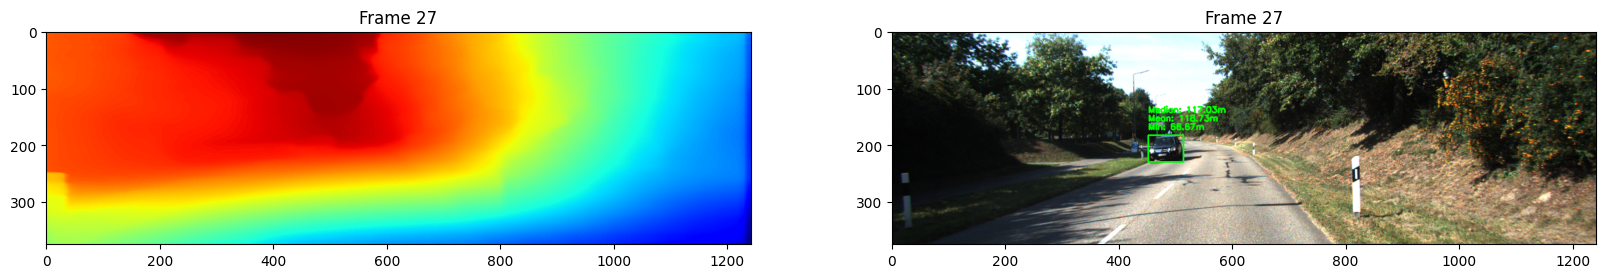


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000027.png: 224x640 1 car, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Frame 28 - Min: -0.38m - Max: 1063.11m


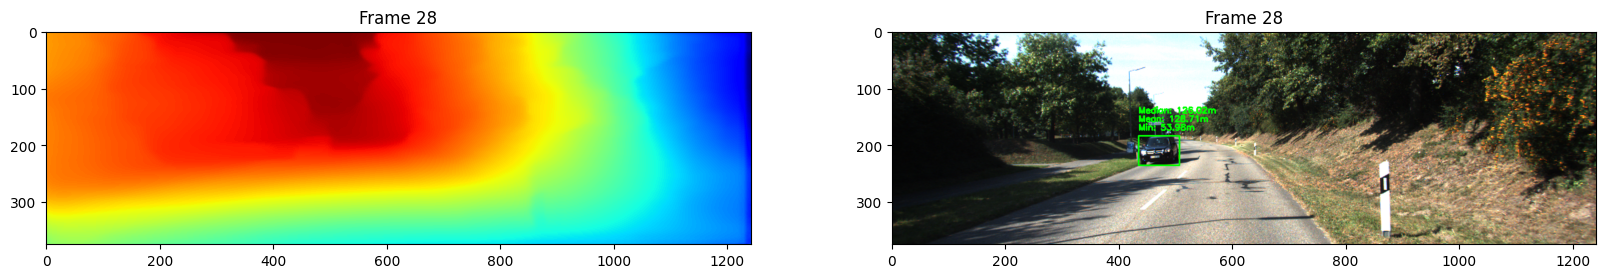


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000028.png: 224x640 1 car, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Frame 29 - Min: -4.92m - Max: 760.67m


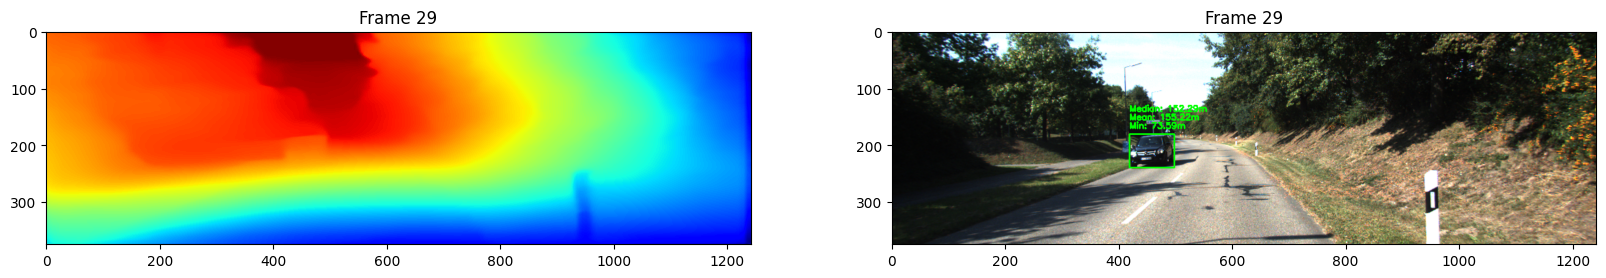


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000029.png: 224x640 1 car, 31.0ms
Speed: 1.3ms preprocess, 31.0ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Frame 30 - Min: 3.61m - Max: 854.08m


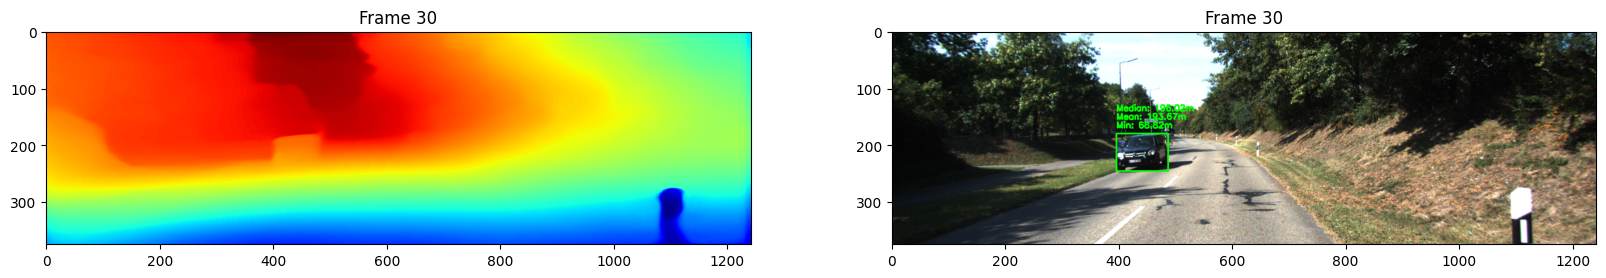


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000030.png: 224x640 1 car, 31.0ms
Speed: 1.3ms preprocess, 31.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Frame 31 - Min: -1.89m - Max: 804.53m


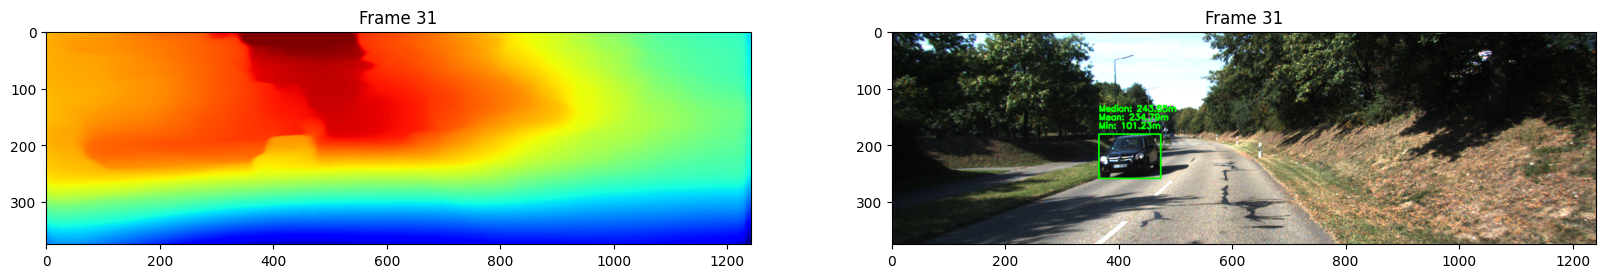


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000031.png: 224x640 1 car, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Frame 32 - Min: -4.01m - Max: 919.80m


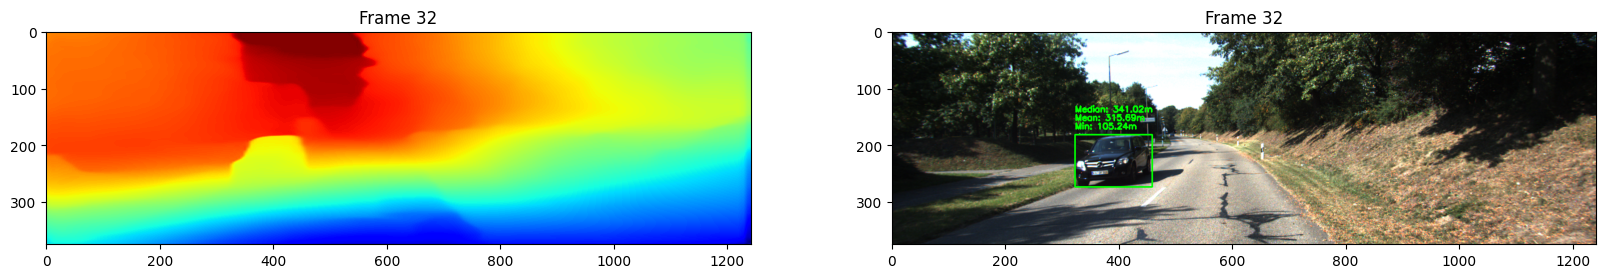


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000032.png: 224x640 1 car, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Frame 33 - Min: -0.23m - Max: 806.28m


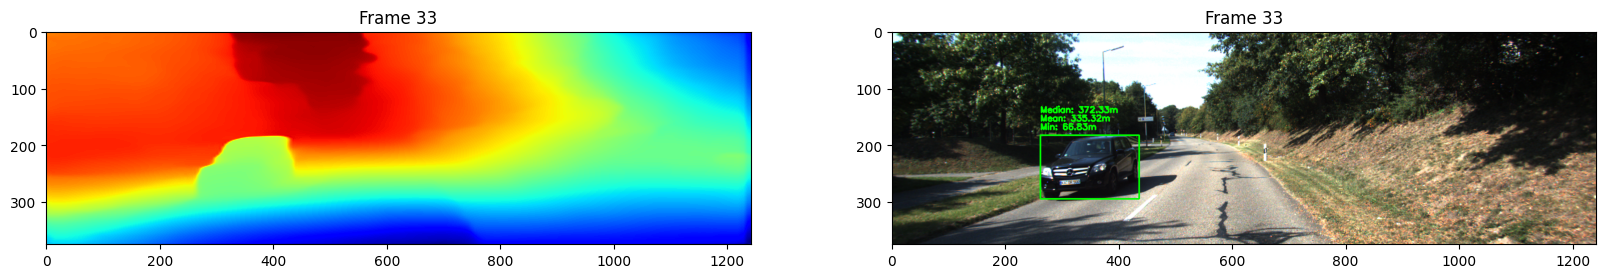


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000033.png: 224x640 1 car, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Frame 34 - Min: -1.59m - Max: 920.73m


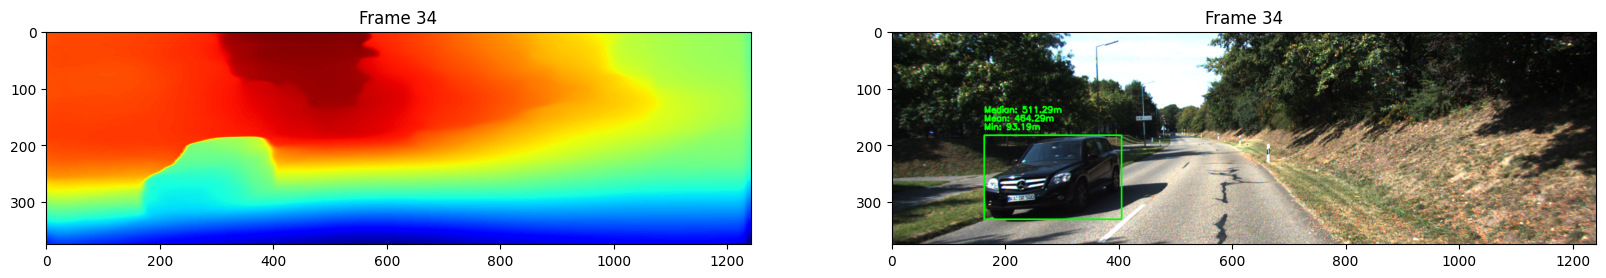


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000034.png: 224x640 1 car, 31.1ms
Speed: 1.4ms preprocess, 31.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Frame 35 - Min: -0.23m - Max: 816.20m


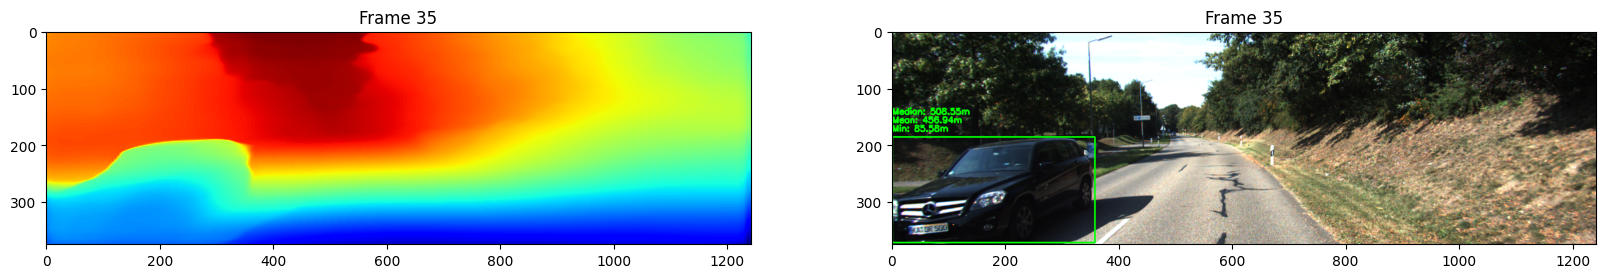


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000035.png: 224x640 1 car, 31.1ms
Speed: 1.3ms preprocess, 31.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Frame 36 - Min: 5.58m - Max: 1089.79m


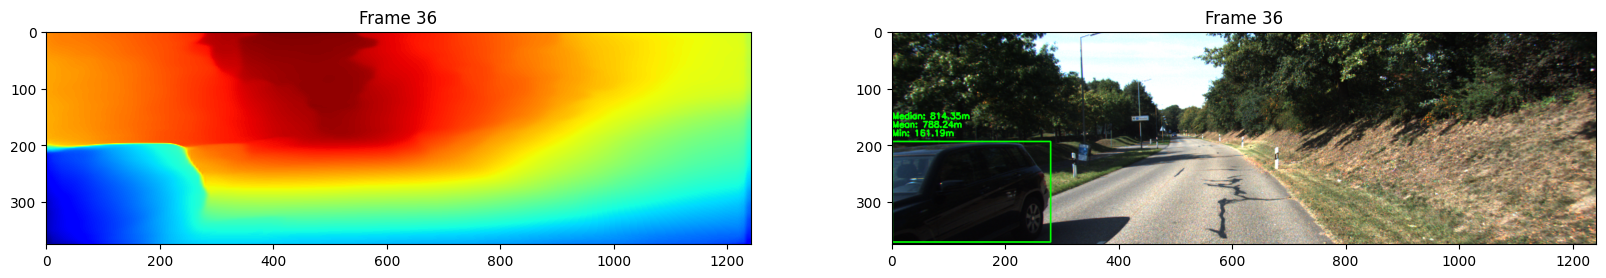

In [5]:
import cv2
import tensorflow as tf
import urllib.request
import matplotlib.pyplot as plt
import glob
import numpy as np
from ultralytics import YOLO

# Load MiDaS model
model_path = '/model/1.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']

object_model = YOLO("/model/yolov8s.pt")

left_video = sorted(glob.glob("/data/video - kitti/video - kitti/image_02/data/*.png"))

if len(left_video) == 0:
    print("Không tìm thấy ảnh trong thư mục")
    exit()

start_frame = 25
end_frame = 35

for i in range(start_frame, end_frame + 1):
    # Đọc hình ảnh
    left_im = cv2.imread(left_video[i])
    left_img = cv2.cvtColor(left_im, cv2.COLOR_BGR2RGB)

    # Preprocess image for MiDaS
    img_resized = tf.image.resize(left_img / 255.0, [256, 256], method='bicubic', preserve_aspect_ratio=False)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img_input = (img_resized.numpy() - mean) / std
    reshape_img = img_input.reshape(1, 256, 256, 3)
    tensor = tf.convert_to_tensor(reshape_img, dtype=tf.float32)

    interpreter.set_tensor(input_details[0]['index'], tensor)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    output = output.reshape(256, 256)
    depth_map = cv2.resize(output, (left_img.shape[1], left_img.shape[0]), interpolation=cv2.INTER_CUBIC)

    # Đảo ngược bản đồ độ sâu CHO HIỂN THỊ
    depth_map_display = -1 * depth_map  # Chỉ đảo ngược cho hiển thị

    results = object_model.predict(source=left_video[i])
    boxes = results[0].boxes.xyxy.cpu().numpy()

    for box in boxes:
        x1, y1, x2, y2 = box.tolist()

        depth_region = depth_map[int(y1):int(y2), int(x1):int(x2)]
        depth_min = np.min(depth_region)
        depth_mean = np.mean(depth_region)
        depth_median = np.median(depth_region)

        cv2.rectangle(left_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(left_img, f"Min: {depth_min:.2f}m", (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.putText(left_img, f"Mean: {depth_mean:.2f}m", (int(x1), int(y1 - 25)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.putText(left_img, f"Median: {depth_median:.2f}m", (int(x1), int(y1 - 40)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    depth_min_global = np.min(depth_map)
    depth_max_global = np.max(depth_map)

    plt.figure(figsize=(20, 18))

    # Hiển thị depth map bên trái
    plt.subplot(1, 2, 1)
    plt.imshow(depth_map_display, cmap='jet')  # Hiển thị depth_map_display
    plt.title(f"Frame {i + 1}")

    plt.subplot(1, 2, 2)
    plt.imshow(left_img)
    plt.title(f"Frame {i + 1}")

    print(f"Frame {i + 1} - Min: {depth_min_global:.2f}m - Max: {depth_max_global:.2f}m")

    plt.show()

    for box in boxes:
        x1, y1, x2, y2 = box.tolist()

In [6]:
import cv2
import tensorflow as tf
import urllib.request
import matplotlib.pyplot as plt
import glob
import numpy as np
from ultralytics import YOLO

# Danh sách các ảnh trong video
left_video = sorted(glob.glob("/data/video - kitti/video - kitti/image_02/data/*.png"))

# Kiểm tra xem có ảnh nào trong thư mục không
if len(left_video) == 0:
    print("Không tìm thấy ảnh trong thư mục")
    exit()

# Load MiDaS model
model_path = '/model/1.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']

object_model = YOLO("model/yolov8s.pt")

video_out = []
for i in range(len(left_video)):
    # Đọc hình ảnh
    left_im = cv2.imread(left_video[i])
    left_img = cv2.cvtColor(left_im, cv2.COLOR_BGR2RGB)

    # Preprocess image for MiDaS
    img_resized = tf.image.resize(left_img / 255.0, [256, 256], method='bicubic', preserve_aspect_ratio=False)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img_input = (img_resized.numpy() - mean) / std
    reshape_img = img_input.reshape(1, 256, 256, 3)
    tensor = tf.convert_to_tensor(reshape_img, dtype=tf.float32)

    # Dự đoán độ sâu bằng MiDaS
    interpreter.set_tensor(input_details[0]['index'], tensor)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    output = output.reshape(256, 256)
    depth_map = cv2.resize(output, (left_img.shape[1], left_img.shape[0]), interpolation=cv2.INTER_CUBIC)

    # Đảo ngược bản đồ độ sâu
    depth_map = -1 * depth_map  

    # Tìm giá trị tối thiểu toàn cục
    depth_min_global = np.min(depth_map)

    # Cộng giá trị tối thiểu vào tất cả các giá trị trong bản đồ độ sâu
    depth_map = depth_map + abs(depth_min_global) 

    # Phát hiện đối tượng
    results = object_model.predict(source=left_video[i])
    boxes = results[0].boxes.xyxy.cpu().numpy()

    # Vẽ khung bao và in thông tin độ sâu (trên hình ảnh gốc)
    for box in boxes:
        x1, y1, x2, y2 = box.tolist()

        # Tính toán độ sâu và xử lý NaN
        depth_region = depth_map[int(y1):int(y2), int(x1):int(x2)]
        depth_min = np.min(depth_region)
        depth_mean = np.mean(depth_region)
        depth_median = np.median(depth_region)

        cv2.rectangle(left_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(left_img, f"Min: {depth_min:.2f}m", (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.putText(left_img, f"Mean: {depth_mean:.2f}m", (int(x1), int(y1 - 25)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.putText(left_img, f"Median: {depth_median:.2f}m", (int(x1), int(y1 - 40)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Lưu hình ảnh vào danh sách video_out
    video_out.append(left_img)

# Lưu video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('out6.avi', fourcc, 12, (1242, 375))  # Thay đổi FPS thành 12
for i in range(len(video_out)):
    out.write(cv2.cvtColor(video_out[i], cv2.COLOR_BGR2RGB))
out.release()
print('Finish')


image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000000.png: 224x640 (no detections), 31.6ms
Speed: 1.2ms preprocess, 31.6ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 640)

image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000001.png: 224x640 1 car, 27.4ms
Speed: 1.4ms preprocess, 27.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)

image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000002.png: 224x640 1 car, 27.5ms
Speed: 1.3ms preprocess, 27.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)

image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000003.png: 224x640 1 car, 27.4ms
Speed: 2.0ms preprocess, 27.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)

image 1/1 /kaggle/input/input-data/video - kitti/image_02/data/0000000004.png: 224x640 1 car, 27.4ms
Speed: 1.3ms preprocess, 27.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 